# Encoding
**Encoding specifically involves transforming categorical data into numerical data so that it can be effectively used by algorithms**

**Summary**
* Label Encoding: Maps categories to integer values.
* One-Hot Encoding: Converts each category into a binary vector.
* Binary Encoding: Encodes categories into binary numbers.
* Ordinal Encoding: Maps categories to ordered integer values.
* Frequency Encoding: Replaces categories with their frequency counts.

# Scaling - to make the magnitude (range) equal for all features (columns)
**Scaling refers to the process of adjusting the range and distribution of numerical data to improve the performance and convergence of machine learning algorithms.**

- 100 - 1
- 200 - 2
- 300 - 3

#Before Scaling
- salary - 10000,20000,30000
- age - 10, 20, 30

- In the above case, since salary magnitude is higher it will be given more importance by the machine learning model

#after scaling
- salary - 1,2,3
- age - 1,2,3

- After Scaling, both features are given equal importance

# Encoding

In [7]:
import pandas as pd

# Example DataFrame
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'green', 'red']})
df

,color
0,red
1,green
2,blue
3,green
4,red


In [8]:
encode = {"red":1, "green": 2, "blue": 3}

df["color"] = df["color"].map(encode)

In [9]:
df

,color
0,1
1,2
2,3
3,2
4,1


# Label Encoding

In [97]:
from sklearn.preprocessing import LabelEncoder

In [103]:
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'green', 'red']})
df


,color
0,red
1,green
2,blue
3,green
4,red


In [105]:
le = LabelEncoder()

df["color"] = le.fit_transform(df['color'])
df

,color
0,2
1,1
2,0
3,1
4,2


In [13]:
df = pd.DataFrame({'company': ['ocean', 'tcs', 'wipro', 'royalenfield', 'mahindra']})

In [14]:
df

,company
0,ocean
1,tcs
2,wipro
3,royalenfield
4,mahindra


In [15]:
le = LabelEncoder()

df["company"] = le.fit_transform(df['company'])
df

,company
0,1
1,3
2,4
3,2
4,0


# Target encoding

In [17]:
df = pd.DataFrame({'company': ['ocean', 'tcs', 'wipro', 'royalenfield', 'mahindra']})

In [18]:
encode = {"ocean":1, "tcs": 2, "royalenfield": 3,"mahindra": 4,"wipro":5}

df["company"] = df["company"].map(encode)

In [19]:
df

,company
0,1
1,2
2,5
3,3
4,4


In [56]:
df = pd.DataFrame({'company': ['ocean', 'tcs', 'wipro', 'royalenfield', 'mahindra']})

In [27]:
df

,company
0,ocean
1,tcs
2,wipro
3,royalenfield
4,mahindra


# OneHotEncoding

In [69]:
df = pd.DataFrame({'company': ['ocean', 'tcs', 'wipro', 'royalenfield', 'mahindra']})

In [71]:
df = pd.get_dummies(df, columns = ["company"])

In [73]:
df

,company_mahindra,company_ocean,company_royalenfield,company_tcs,company_wipro
0,False,True,False,False,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,False,True,False,False
4,True,False,False,False,False


# Frequency Encoding

In [78]:
df = pd.DataFrame({'company': ['ocean', 'tcs', 'wipro', 'royalenfield', 'mahindra']})

In [88]:
frequency = df['company'].value_counts(normalize=True).to_dict()

In [90]:
df['company'] = df['company'].map(frequency)

In [92]:
df

,company
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


# Scaling

### Scaling - to make the magnitude (range) equal for all features (columns)
**Scaling refers to the process of adjusting the range and distribution of numerical data to improve the performance and convergence of machine learning algorithms.**

In [114]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [116]:
df['age'].skew()

0.38910778230082704

In [118]:
df['fare'].skew()

4.787316519674893

In [120]:
from sklearn.preprocessing import StandardScaler

In [124]:
ss=StandardScaler()
df[['age']]=ss.fit_transform(df[['age']])

In [126]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.530377,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.571831,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.254825,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.365167,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.365167,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.185937,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,-0.737041,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,-0.254825,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Robust Scalar

In [129]:
df['fare'].skew()

4.787316519674893

-  fare column is right skewed which will have positive outliers

In [132]:
from sklearn.preprocessing import RobustScaler

In [134]:
rs=RobustScaler()
df[['fare']]=rs.fit_transform(df[['fare']])

In [136]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.530377,1,0,-0.312011,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.571831,1,0,2.461242,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.254825,0,0,-0.282777,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.365167,1,0,1.673732,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.365167,0,0,-0.277363,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.185937,0,0,-0.062981,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,-0.737041,0,0,0.673281,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,0.389604,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,-0.254825,0,0,0.673281,C,First,man,True,C,Cherbourg,yes,True


# MinMaxScalar

In [220]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [222]:
df=sns.load_dataset("tips")

In [223]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [226]:
df['total_bill'].skew()

1.1332130376158205

In [227]:
df['tip'].skew()

1.4654510370979401

<Axes: xlabel='tip', ylabel='Density'>

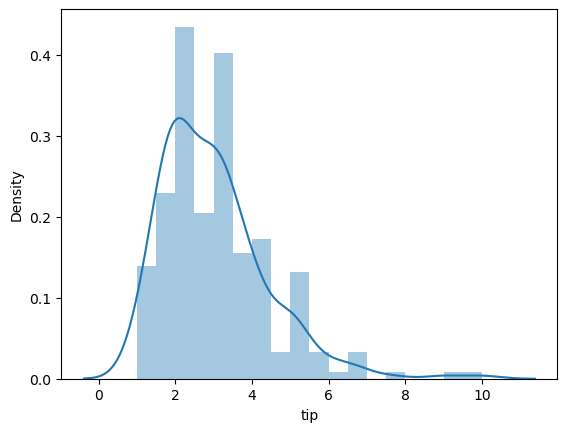

In [230]:
sns.distplot(df['tip'])

In [231]:
from sklearn.preprocessing import MinMaxScaler

In [232]:
ms=MinMaxScaler()

In [233]:
df[['tip']]=ms.fit_transform(df[['tip']])

In [237]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,0.001111,Female,No,Sun,Dinner,2
1,10.34,0.073333,Male,No,Sun,Dinner,3
2,21.01,0.277778,Male,No,Sun,Dinner,3
3,23.68,0.256667,Male,No,Sun,Dinner,2
4,24.59,0.290000,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,0.546667,Male,No,Sat,Dinner,3
240,27.18,0.111111,Female,Yes,Sat,Dinner,2
241,22.67,0.111111,Male,Yes,Sat,Dinner,2
242,17.82,0.083333,Male,No,Sat,Dinner,2


In [239]:
df['tip'].skew()

1.4654510370979401

<Axes: xlabel='tip', ylabel='Density'>

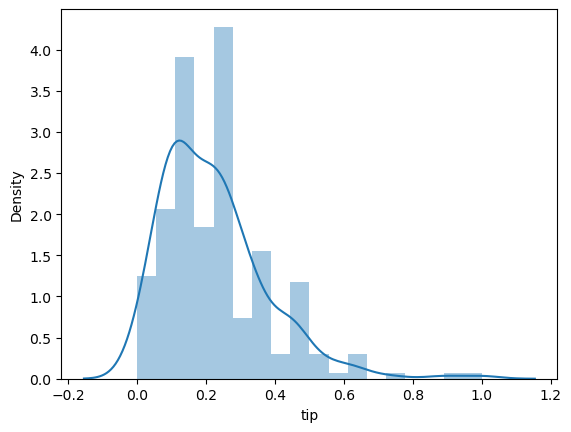

In [240]:
sns.distplot(df['tip'])

# Transformation
- **Transformation is used to make your data normal.**

In [244]:
df.tip.skew()

1.4654510370979401

In [246]:
from sklearn.preprocessing import PowerTransformer

In [249]:
pt = PowerTransformer(method = "yeo-johnson")

In [251]:
df[['tip']] = pt.fit_transform(df[['tip']])

In [253]:
df.tip.skew()

0.05966080550677163

<Axes: xlabel='tip', ylabel='Density'>

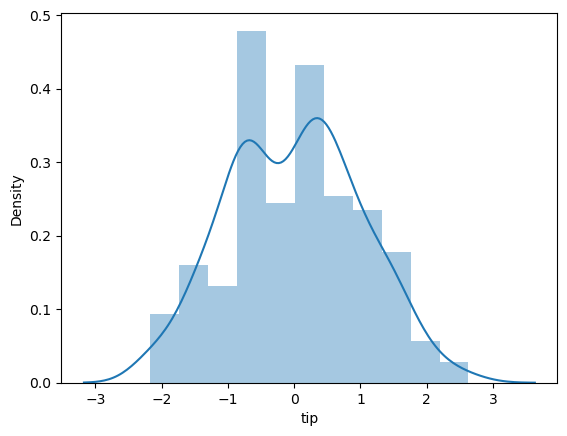

In [255]:
sns.distplot(df['tip'])

In [257]:
df.total_bill.skew()

1.1332130376158205

In [259]:
import numpy as np

<Axes: xlabel='total_bill', ylabel='Density'>

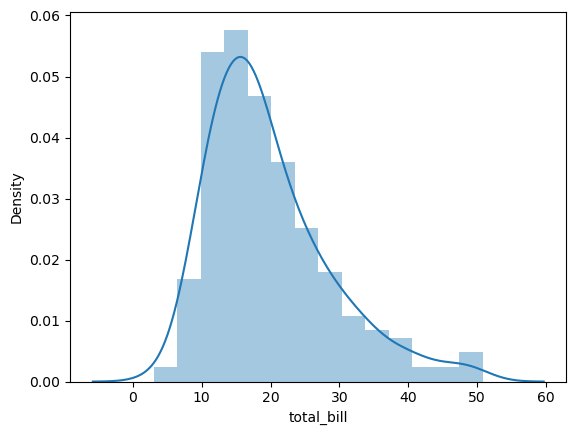

In [261]:
sns.distplot(df['total_bill'])

In [263]:
df[['total_bill']] = np.log1p(df[['total_bill']])

In [265]:
df.total_bill.skew()

-0.010800869997070795

<Axes: xlabel='total_bill', ylabel='Density'>

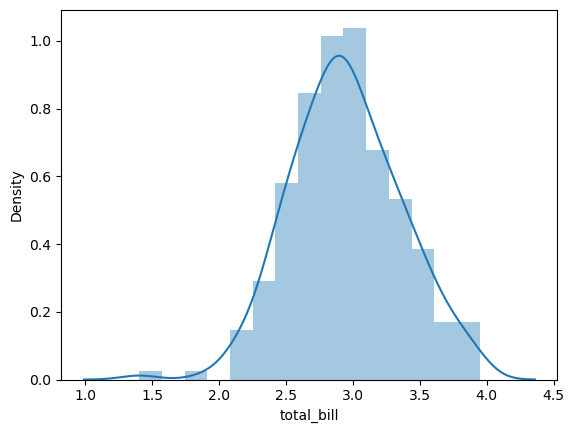

In [267]:
sns.distplot(df['total_bill'])